In [1]:
import numpy as np
import pandas as pd
import xarray as xr

from pathlib import Path

import altair as alt
from altair.expr import datum

In [2]:
%load_ext watermark

In [3]:
%watermark --iversions

xarray    0.12.0
numpy     1.16.3
altair    3.0.1
pandas    0.24.2



In [4]:
from utils.load import load_sensitivity_data
from utils.calculate_metrics import (process_data, relative_errors, summary_errors)

## Set paths 

In [5]:
data_path = Path('../data')
path_to_results = data_path / "simulation_results"
khodayari_path = path_to_results / "Khodayari"
millard_path = path_to_results / "Millard"
kurata_path = path_to_results / "Kurata"
chassagnole_path = path_to_results / "Chassagnole"

In [5]:
((zwf_df, pgi_df, eno_df), debug_info) = load_sensitivity_data()

In [6]:
zwf_df.head()

,flux,ID,BiGG_ID,author,sample_id,normalized_flux
0,-0.020954,ACALD,ACALD,Khodayari,dzwf,-0.472740
1,-0.004096,ACALDtpp_ex,composed of ACALDtex and ACALDtpp,Khodayari,dzwf,-0.092400
2,-0.009307,ACKr,ACKr,Khodayari,dzwf,-0.209985
3,4.326233,ACONTa,ACONTa,Khodayari,dzwf,97.604637
4,4.441212,ACONTb,ACONTb,Khodayari,dzwf,100.198682


In [9]:
xdf_zwf = process_data(zwf_df, author="Nicolas")
xdf_pgi = process_data(pgi_df, author="Usui")
xdf_eno = process_data(eno_df, author="Usui")

In [10]:
xdf_pgi.BiGG_ID

<xarray.DataArray 'BiGG_ID' (BiGG_ID: 29)>
array(['ACKr', 'AKGDH', 'CS', 'EDA', 'EDD', 'ENO', 'FBA', 'FUM', 'G6PDH2r',
       'GAPD', 'GLCptspp', 'GND', 'ICDHyr', 'ICL', 'PDH', 'PFK', 'PGI', 'PGK',
       'PGM', 'PPC', 'PPCK', 'PTAr', 'PYK', 'RPE', 'RPI', 'SUCDi', 'TALA',
       'TKT1', 'TPI'], dtype=object)
Coordinates:
  * BiGG_ID  (BiGG_ID) object 'ACKr' 'AKGDH' 'CS' 'EDA' ... 'TALA' 'TKT1' 'TPI'

# 2. Calculate error metrics

In [11]:
x_rel_error_zwf = relative_errors(xdf_zwf, author="Nicolas")
x_rel_error_pgi = relative_errors(xdf_pgi, author="Usui")
x_rel_error_eno = relative_errors(xdf_eno, author="Usui")

In [12]:
x_norm_error_zwf = summary_errors(xdf_zwf, author="Nicolas")
x_norm_error_pgi = summary_errors(xdf_pgi, author="Usui")
x_norm_error_eno = summary_errors(xdf_eno, author="Usui")

# 4. Visualize

### Summary normalized error for the models

In [13]:
from utils.vis import heatmap, summary_chart

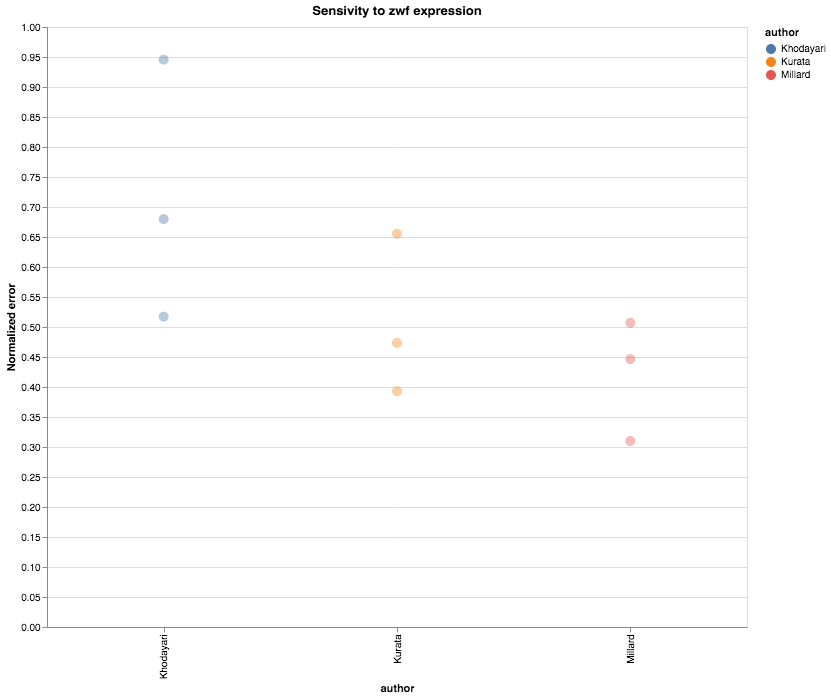

In [14]:
summary_chart(norm_error=x_norm_error_zwf,
              author="Nicolas",
              title="Sensivity to zwf expression",
              sort_list=["Khodayari", "Kurata", "Millard"])

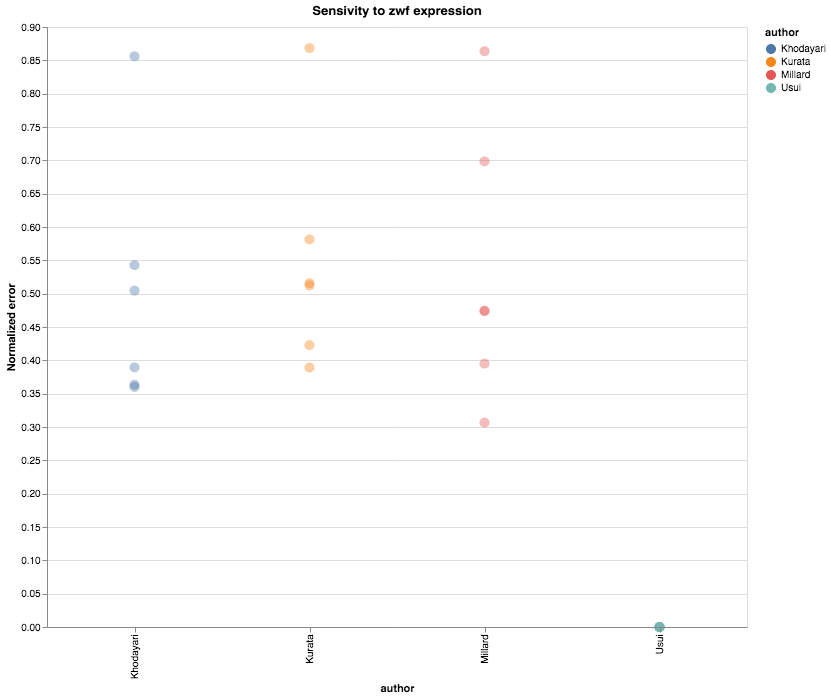

In [20]:
summary_chart(norm_error=x_norm_error_pgi,
              author="Nicolas",
              title="Sensivity to zwf expression",
              sort_list=["Khodayari", "Kurata", "Millard"])

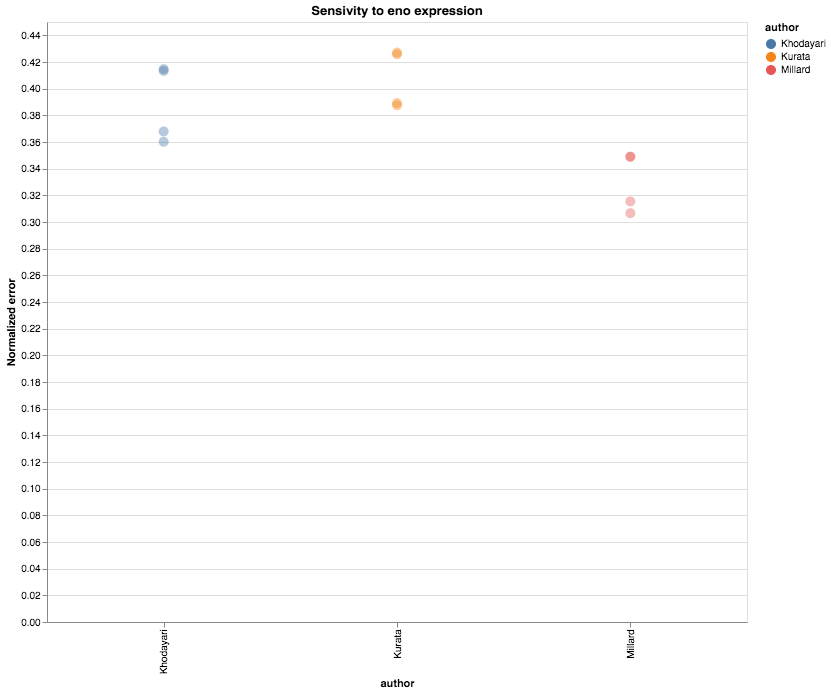

In [19]:
summary_chart(norm_error=x_norm_error_eno,
              author="Usui",
              title="Sensivity to eno expression",
              sort_list=["Khodayari", "Kurata", "Millard"])

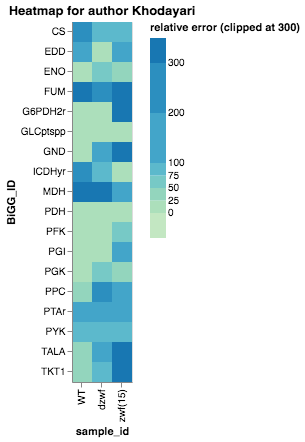

In [15]:
heatmap(xdf=x_rel_error_zwf, author="Khodayari")

In [16]:
x_rel_error_zwf.sel(author="Khodayari").to_dataframe()

author          flux  normalized_flux  relative_error  \
BiGG_ID  sample_id                                                             
CS       WT         Khodayari  9.788618e+01        89.114651      262.254681   
         dzwf       Khodayari  4.242277e+00        95.710496       88.036338   
         zwf(15)    Khodayari  2.174000e+00        55.109565       92.690785   
EDD      WT         Khodayari  2.533307e-09         0.000000      100.000000   
         dzwf       Khodayari -1.156589e-10         0.000000        0.000000   
         zwf(15)    Khodayari  3.326007e-10         0.000000      100.000000   
ENO      WT         Khodayari  1.708927e+02       155.579062        2.085998   
         dzwf       Khodayari  3.626887e+00        81.826607       51.235634   
         zwf(15)    Khodayari  3.930818e+00        99.643830       33.526464   
FUM      WT         Khodayari  8.848903e+01        80.559575      444.321450   
         dzwf       Khodayari  5.882956e+00       132.726029      212.296539   
         zwf(15)    Khodayari  4.390198e+00       111.288839      491.961911   
G6PDH2r  WT         Khodayari  1.963329e+01        17.873960        9.727477   
         dzwf       Khodayari  5.706007e-08         0.000000        0.000000   
         zwf(15)    Khodayari  5.711482e+00       144.782588      552.173818   
GLCptspp WT         Khodayari  1.097149e+02        99.883432        0.116568   
         dzwf       Khodayari  4.326026e+00        97.599968        2.400032   
         zwf(15)    Khodayari  3.950569e+00       100.144522        0.144522   
GND      WT         Khodayari  1.788504e+01        16.282374       11.523111   
         dzwf       Khodayari  1.675605e-02         0.378035      100.000000   
         zwf(15)    Khodayari  6.127790e+00       155.335746      963.943463   
ICDHyr   WT         Khodayari  8.371312e+01        76.211632      209.803381   
         dzwf       Khodayari  4.012771e+00        90.532583       77.863621   
         zwf(15)    Khodayari  1.347946e+00        34.169596       19.474111   
MDH      WT         Khodayari  9.665129e+01        87.990418      494.529849   
         dzwf       Khodayari  6.148124e+00       138.708516      337.566297   
         zwf(15)    Khodayari  1.994026e+00        50.547343      168.868844   
PDH      WT         Khodayari  1.278265e+02       116.372078       17.074525   
         dzwf       Khodayari  5.525178e+00       124.654153        5.728713   
         zwf(15)    Khodayari  3.849557e+00        97.583928        1.827034   
PFK      WT         Khodayari  9.151699e+01        83.316197        2.859502   
         dzwf       Khodayari  4.274862e+00        96.445641        4.491485   
         zwf(15)    Khodayari  8.932034e-01        22.642160       71.156484   
PGI      WT         Khodayari  8.740332e+01        79.571154        1.493819   
         dzwf       Khodayari  4.391612e+00        99.079652        0.588479   
         zwf(15)    Khodayari -1.791227e+00       -45.406509      159.824122   
PGK      WT         Khodayari  1.732245e+02       157.701958        4.941557   
         dzwf       Khodayari  3.763519e+00        84.909164       52.670477   
         zwf(15)    Khodayari  4.189408e+00       106.198926       35.046528   
PPC      WT         Khodayari  1.854258e+01        16.880989       35.073118   
         dzwf       Khodayari -1.823968e+00       -41.150744      224.322490   
         zwf(15)    Khodayari -9.061115e-03        -0.229694      100.883437   
PTAr     WT         Khodayari -4.204446e-03         0.000000      100.000000   
         dzwf       Khodayari -2.584362e-02        -0.583061      101.325138   
         zwf(15)    Khodayari -1.698428e-02        -0.430541      100.978503   
PYK      WT         Khodayari  3.197041e+01        29.105559       75.745368   
         dzwf       Khodayari  6.513002e-01        14.694057       88.618081   
         zwf(15)    Khodayari  1.975666e-01         5.008192       95.734078   
TALA     WT         Kho

# Export the data

In [33]:
sensitivity_data = pd.concat([selected_data_zwf, selected_data_pgi, selected_data_eno], sort=False)

In [37]:
path = data_path / "Processed"
path.mkdir(parents=True, exist_ok=True)
sensitivity_data.to_csv(path / "sensitivity.csv")